# <span style="color:orange;">1.0.</span> Business Problem

## <span style="color:orange;">1.1.</span> Context

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Problem description on Kaggle: click here to more information.

Note: the example has Rs. i.e. Rupee, an Indian money sign. So, the problem potentially is from an indian company.

## <span style="color:orange;">1.2.</span> Understanding the problem

### <span style="color:orange;">1.2.1.</span> Motivation


An Insurance company wants to cross sell the health insurance with vehicle insurance.

### <span style="color:orange;">1.2.2.</span> Root Cause of the problem

Ensuring optimal coverage for both health and vehicle-related contingencies poses a unique challenge in cross-selling insurance products. Identifying clients willing to accept vehicle insurance alongside their health coverage while also remaining cognizant of potential health and vehicle-related issues is paramount.

The primary objective lies in attracting clients who not only find value in bundling these insurances but also contribute to the profitability of the portfolio.

### <span style="color:orange;">1.2.3.</span> Solution Format

- Granularity and problem type: ID classification of interested or not
- Potential solution methods: logistic regression, tree based models, KNN;
- Delivery format:
    - Client prediction of interest on vehicle insurance;
    - Possibility of google sheets to check the clients information and customize the priorization, not just by rank of customer profit.

# <span style="color:orange;">2.0.</span> Imports

## <span style="color:orange;">2.1.</span> Libraries

In [15]:
import inflection
import seaborn     as sns
import pandas      as pd
import numpy       as np

from matplotlib              import pyplot as plt
from matplotlib              import gridspec
from IPython.display         import Image
from helpers                 import get_first_order_statistics

## <span style="color:orange;">2.2.</span> Loading Data

In [16]:
df = pd.read_csv("../src/data/raw/train.csv")

df = df.drop(['id'], axis=1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# <span style="color:orange;">3.</span> Data Description

| Variable              | Definition                                                                                  |
|-----------------------|---------------------------------------------------------------------------------------------|
| Gender                | Gender of the customer                                                                      |
| Age                   | Age of the customer                                                                         |
| Driving_License       | 0 : Customer does not have DL, 1 : Customer already has DL                                  |
| Region_Code           | Unique code for the region of the customer                                                  |
| Previously_Insured    | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance      |
| Vehicle_Age           | Age of the Vehicle                                                                          |
| Vehicle_Damage        | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium        | The amount customer needs to pay as premium in the year                                      |
| Policy_Sales_Channel  | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage               | Number of Days, Customer has been associated with the company                               |
| Response              | 1 : Customer is interested, 0 : Customer is not interested                                  |


## <span style="color:orange;">3.1.</span> Rename Columns

In [17]:
# Rename columns do snake_case style
df.columns = [inflection.underscore(col) for col in df.columns]
df.head().T

,0,1,2,3,4
gender,Male,Male,Male,Male,Female
age,44,76,47,21,29
driving_license,1,1,1,1,1
region_code,28.0,3.0,28.0,11.0,41.0
previously_insured,0,0,0,1,1
vehicle_age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
vehicle_damage,Yes,No,Yes,No,No
annual_premium,40454.0,33536.0,38294.0,28619.0,27496.0
policy_sales_channel,26.0,26.0,26.0,152.0,152.0
vintage,217,183,27,203,39


## <span style="color:orange;">3.2.</span> Data Dimension

In [18]:
print('Number of Rows {}'.format(df.shape[0]))
print('Number of Cols {}'.format(df.shape[1]))

Number of Rows 381109
Number of Cols 11


## <span style="color:orange;">3.3.</span> Data Type

In [19]:
df.dtypes

gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## <span style="color:orange;">3.4.</span> Check NA

In [20]:
df.isna().sum()## <span style="color:orange;">3.4.</span> Check NA

gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## <span style="color:orange;">3.5.</span> Descriptive Statistics

Before we start, I want to separate the numerical and categorical variables, just because the analysis to these sets are different.

In [21]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### <span style="color:orange;">3.5.1.</span> Numerical Attributes

In [22]:
get_first_order_statistics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
2,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
3,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871
4,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
5,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
6,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
7,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906,3.298788


1. Large difference in scales between attributes:

    - There is a vast difference in the range in some features. Higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training some models. It's needed to apply some sort of scaling over the features.

2. Skewness and kurtosis:

    - Some variables, such as `driving_license`, have **extreme skewness** (skew of -21.6) and very high **kurtosis** (464.35). This indicates a very high concentration on one value (almost all records have `driving_license` equal to 1), having **almost no variability**, which may not add much information to the model, since almost all values ​​are the same.

    - The skewness and kurtosis are also relevant for the `annual_premium` variable, with high positive skewness (1.77) and kurtosis (34.0), suggesting that there are **extreme outliers** in the annual premiums.

3. Balanced/unbalanced distribution:

    - The response variable has a mean of 0.122, suggesting that only about 12% of customers are interested in the product, meaning that the data is imbalanced. This type of imbalance can negatively impact classification models and requires techniques such as undersampling, oversampling, or the use of adjusted metrics.


Recommendations:

- **Scaling** is essential due to the large difference between the variable ranges.

- Handling **outliers** can be important, especially for `annual_premium`.

- **Imbalanced data handling** techniques are recommended for the `response` variable.

- Variables with **low variability**, such as `driving_license`, may be irrelevant to the model and could be considered for be removed or other form of feature engineering.


### <span style="color:orange;">3.5.2.</span> Categorical Attributes

In [23]:
# How many levels there is  in each categorical attribute
cat_attributes.nunique()

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

In [24]:
for col in cat_attributes.columns:
    tabela_contingencia = pd.crosstab(df[col], df['response'])
    display(tabela_contingencia)
    print("\n")

response,0,1
gender,,
Female,156835,18185
Male,177564,28525


response,0,1
vehicle_age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


response,0,1
vehicle_damage,,
No,187714,982
Yes,146685,45728


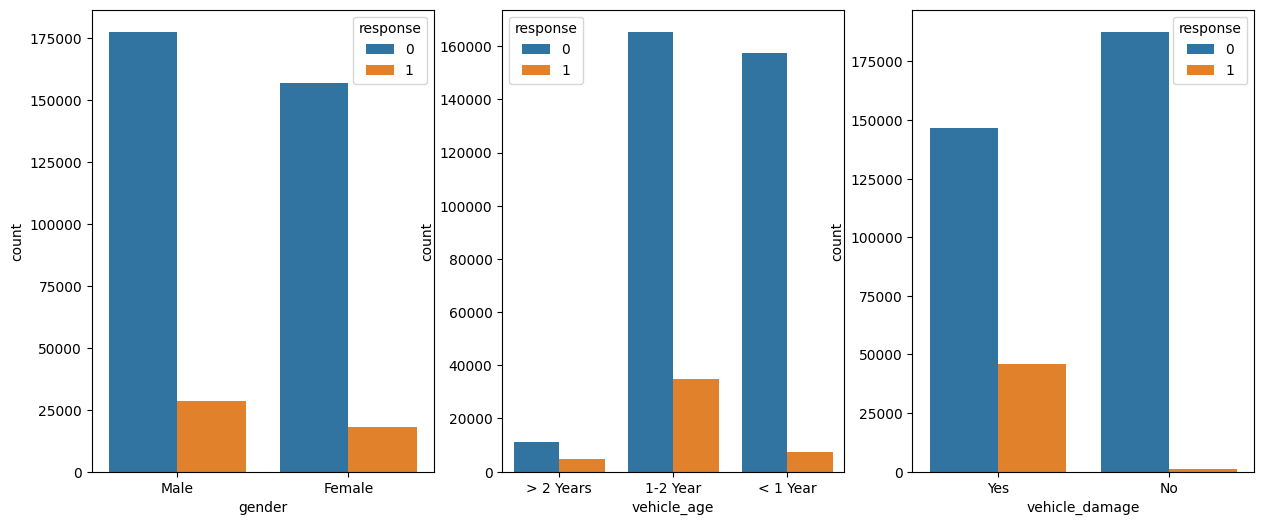

In [25]:
fig = plt.figure(figsize=(15,6))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[0,2])

sns.countplot(x='gender', hue='response', data=df, ax=ax1);

sns.countplot(x='vehicle_age', hue='response', data=df, ax=ax2);

sns.countplot(x='vehicle_damage', hue='response', data=df, ax=ax3);

# <span style="color:orange;">4.</span> Feature Engineering

## <span style="color:orange;">4.1</span> Mind Map Hypothesis

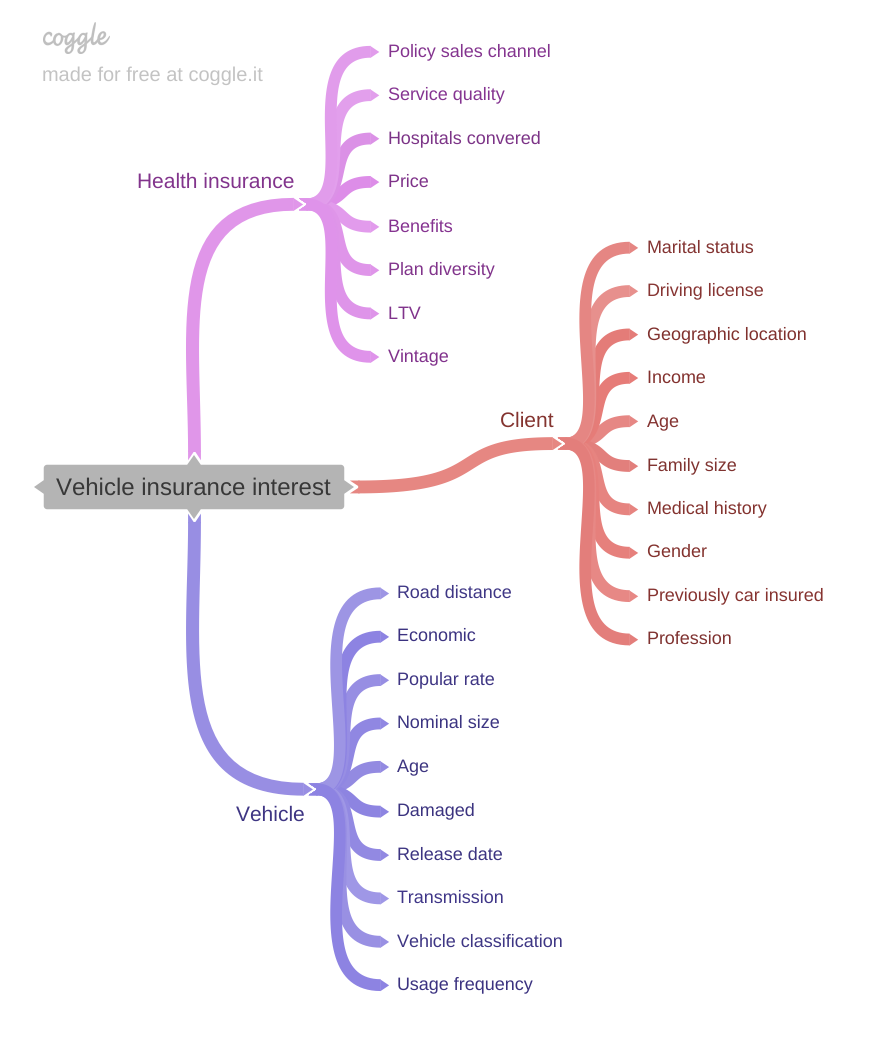

In [26]:

# Business mindmap
Image('../src/visualization/mind_map_hypothesis.png')

## <span style="color:orange;">4.2.</span> Mind Map Hypothesis

### <span style="color:orange;">4.2.1.</span> Health insurance hypothesis

1. Different policy sales channel of health insurance doesn't change the vehicle insurance interest

2. The higher vintage on health insurance, the greater the interest in vehicle insurance

3. The more benefits included on health insurance, the greater the interest on vehicle insurance

4. The more diversity of health insurance plans, the greater the interest on vehicle insurance

5. High service quality of health insurance is essencial to make a conversion on vehicle insurance

6. The more hospitals included in health insurance, the greater the interest on vehicle insurance

7. The higher annual premium price on health insurance, the lower the interest on vehicle insurance

### <span style="color:orange;">4.2.2.</span> Client hypothesis

1. Older customers have less interest on vehicle insurance

2. There isn't a difference between genders when comparing the vehicle insurance interest

3. People who have a driver's license are more likely to purchase car insurance.

4. There is a difference in interest in car insurance depending on the region where the person lives.

5. Customers who already have vehicle insurance are less interested in purchasing new vehicle insurance.

6. Married customers have more interest on vehicle insurance

7. The higher income of customers, the greater the interest on vehicle insurance

8. The greater the family size of customer, the greater the interest in vehicle insurance

9. Bad medical history makes more interest on vehicle insurance

### <span style="color:orange;">4.2.1.</span> Vehicle hypothesis

1. Customers with older vehicle have less interest on vehicle insurance

2. If the vehicle has been damaged, then the vehicle insurance interest is greater

3. If the vehicle is automatic, then the vehicle insurance interest is greater

4. f the vehicle is economic, then the vehicle insurance interest is smaller

5. The higher nominal size, the greater the interest on vehicle insurance

## <span style="color:orange;">4.3.</span> Final hypothesis list

The criterion used here is if we have the data to answer the hypothesis. On the other hand, if we don't have them, we could ask for another sector of the company to get the new data.

Basically, we analyse the data that we have now.

1. Different policy sales channel of health insurance doesn't change the vehicle insurance interest

2. The higher vintage on health insurance, the greater the interest in vehicle insurance

3. The higher annual premium price on health insurance, the lower the interest on vehicle insurance

4. Age influences interest in vehicle insurance

5. There isn't a difference between genders when comparing the vehicle insurance interest

6. People who have a driver's license are more likely to purchase car insurance.

7. There is a difference in interest in car insurance depending on the region where the person lives.

8. Customers who already have vehicle insurance are less interested in purchasing new vehicle insurance.

9. Customers with older vehicle have less interest on vehicle insurance

10. If the vehicle has been damaged, then the vehicle insurance interest is greater

## <span style="color:orange;">4.4.</span> Feature Engineering

In [29]:
# vehicle_age
df['vehicle_age'] = df['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' 
                                            else 'between_1_2_year' if x == '1-2 Year'
                                            else 'below_1_year')

# vehicle_damage
df['vehicle_damage'] = df['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# gender
df['gender'] = df['gender'].apply(lambda x: 'male' if x == 'Male' else 'female')

# Health insurance customer profitability
df['hi_customer_profitability'] = df['annual_premium'].div(df['vintage']).fillna(0)

# Defining the limits for the age bins
bins = [0, 18, 25, 35, 45, 60, 100]  # Adjust the limits as necessary
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']  # Labels for the age ranges

# Creating the new column 'age_binned'
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)  # right=False to include the lower limit



In [28]:
# Saving the data for EDA section
df.to_csv('../src/data/interim/train_processed_01.csv', index=False)